# napari viewer tutorial

Welcome to the tutorial on the **napari** viewer!

This tutorial assumes you have already installed **napari** and know how to
launch the viewer. For help with installation see our
[installation](./installation) tutorial. For help getting started with the
viewer see our [getting started](./getting_started) tutorial.

This tutorial will teach you about the **napari** viewer, including how to use
its graphical user interface (GUI) and how the data within it is organized. At
the end of the tutorial you should understand the both the layout of the viewer
on the screen and the data inside of it.

## launching the viewer

As discussed in [getting started](./getting_started) tutorial the napari viewer
can be launched from the command-line, a python script, an IPython console, or a
jupyter notebook. All four methods launch the same viewer, and anything related
to the interacting with the viewer on the screen applies equally to all of them.
We will use the syntax inside python scripts so you can copy and paste these
examples into scripts and run them.

Let's get stated by launching a viewer with a simple 2D image.

The fastest way to get the viewer open and throw an image up on the screen is
using the `napari.view_image` method:

In [1]:
import napari
from skimage import data

viewer = napari.view_image(data.astronaut(), rgb=True)

In [2]:
viewer.close()

Calling `napari.view_image` will return a `Viewer` object that is the main
object inside **napari**. All the data you add to **napari** will be stored
inside the `Viewer` object and will be accessible from it. This command will
also open the viewer to create a GUI that you can interact with.

You can also create an empty `Viewer` directly and then start adding images to
it. For example:

In [3]:
viewer = napari.Viewer()
new_layer = viewer.add_image(data.astronaut(), rgb=True)

`add_image` accepts the same arguments as `view_image` but returns a layer
rather than a `Viewer`, (as you must already have a viewer to use it).

After running either of those two commands you should now be able to see the
photograph of the astronaut in the **napari** viewer as shown below

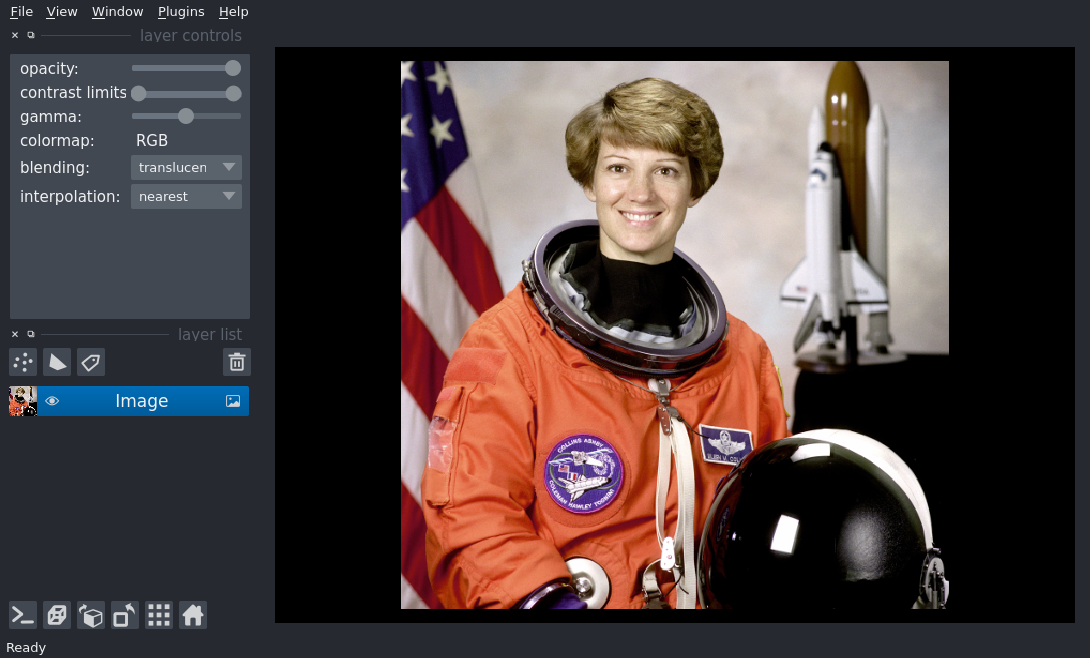

In [4]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

In [5]:
viewer.close()

Both the `view_image` and the `add_image` methods accept any numpy-array like
object as an input, including n-dimensional arrays. For more information on
adding images to the viewer see the [image layer](./image) tutorial. Now we will
continue exploring the rest of the viewer.

## layout of the viewer

The viewer is organized into a few key areas:

![image: viewer layout](../assets/tutorials/viewer_layout.jpg)

We'll go through each of these in the next sections.

### main canvas

The main canvas is in the center of the viewer and contains the visual display
of the data passed to **napari**, including images, point, shapes, and our other
supported data types. Under the hood the canvas is a `vispy.scene.SceneCanvas`
object which has built-in support for features such as zooming and panning. As
`vispy` uses `OpenGL` and your graphics card, panning and zooming are highly
performant. You can also return to the original zoom level by clicking the
`home` button in the viewer buttons panel.

![image: pan and zoom with napari](../assets/tutorials/viewer_pan_zoom.gif)

### layer list

One of the basic **napari** objects are layers. There are different layer types
for `Image`, `Points`, `Shapes`, and other basic data types. They can be added
to the viewer either programmatically or through the GUI. Once added they start
to populate the layer list located on the bottom lefthand side of the main
canvas.

The layer list contains one widget for each of the layers that have been added
to the viewer and includes a `thumbnail` which shows a miniaturized version of
the currently viewed data, a `name` that is an editable text box, `visibility`
button that can be toggled on or off to show or hide the layer, and an `icon`
for the layer type.

Adding the following three image layers using the code below adds three-layer
widgets to the layer list as follows:

In [6]:
viewer = napari.Viewer()
viewer.add_image(data.astronaut(), name='astronaut')
viewer.add_image(data.moon(), name='moon')
viewer.add_image(data.camera(), name='camera')

<Image layer 'camera' at 0x7f88a0bc7e80>

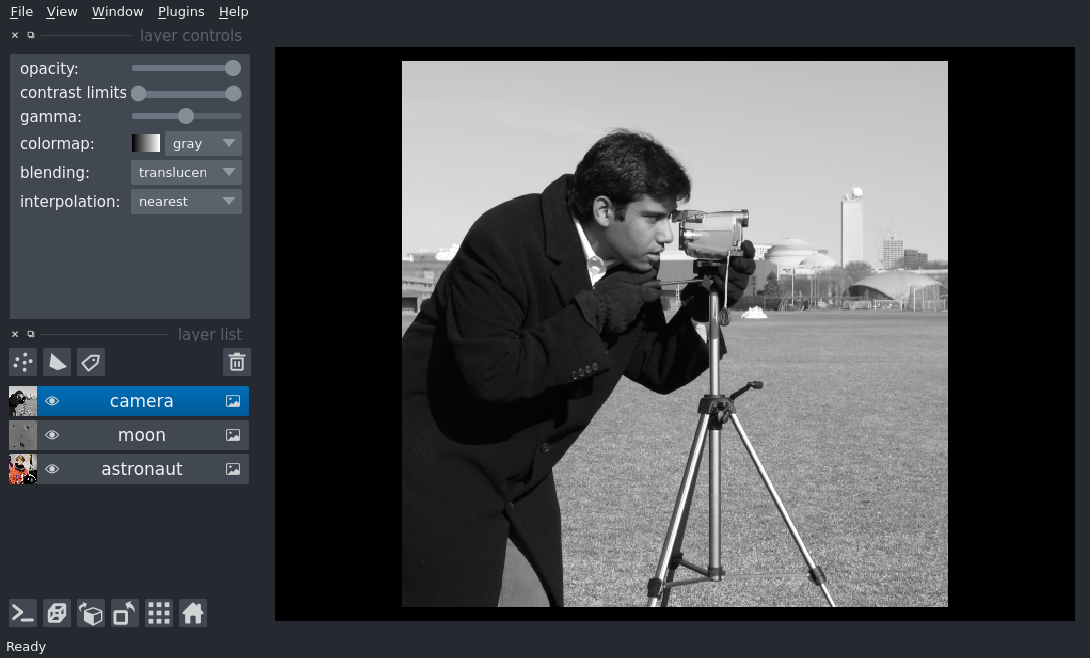

In [7]:
nbscreenshot(viewer)

Note that we've also also named each of the layers using the `name` keyword
argument in `add_image`, and that name has appeared as a string in the layer
widget. The layer name is coerced into being unique so that it can be used to
index into the `LayerList`.

You can select layers, causing them to become outlined, by clicking on their
layer widget. Multiple layers can be simultaneously selected using either
`shift` or `command` click to select either all the layers in between clicked-on
layers or just the clicked-on layers respectively.

You can rearrange the order of the layers by dragging them, including dragging
multiple layers at the same time.

The `Viewer` object also contains our `LayerList` object that allows you to
access the data of all the layers by

In [8]:
viewer.layers

[<Image layer 'astronaut' at 0x7f88a0b265e0>, <Image layer 'moon' at 0x7f88a0d88b20>, <Image layer 'camera' at 0x7f88a0bc7e80>]

This object can be indexed like a normal list using an `int` or using the `str`
name of the layer as follows

In [9]:
viewer.layers[0]

<Image layer 'astronaut' at 0x7f88a0b265e0>

In [10]:
viewer.layers['astronaut']

<Image layer 'astronaut' at 0x7f88a0b265e0>

You can rearrange layers by clicking and dragging them.

In [11]:
viewer.close()

### layer controls

Above the layers list in the top left corner of the viewer there is a box that
contains the layer controls. The controls that you have available to you depend
on the layer type that you have selected.

For example, if you add a `Points` layer after adding an `Image` layer you will
now see different controls present.

In [12]:
import numpy as np

viewer = napari.view_image(data.astronaut(), rgb=True)
points = np.array([[100, 100], [200, 200], [300, 100]])
viewer.add_points(points, size=30)

<Points layer 'points' at 0x7f88a0ee8ac0>

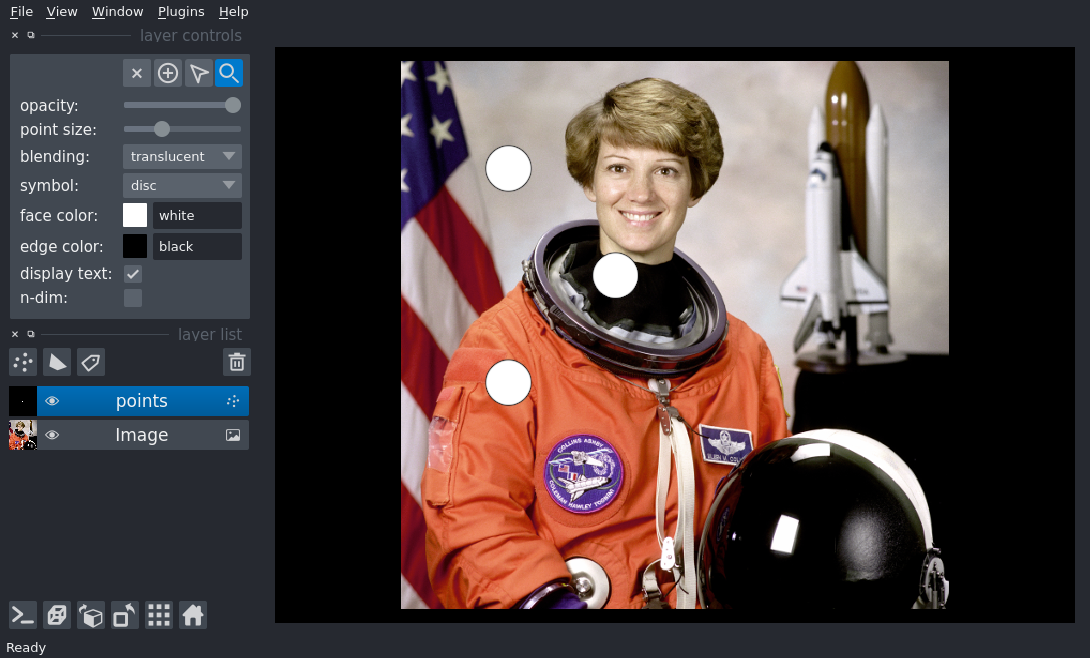

In [13]:
nbscreenshot(viewer)

Adjusting these properties in the GUI will cause corresponding changes to
properties on the individual layers that are accessible in the console through
`viewer.layers`.

For example, the name and opacity of a layer can be changed within the console
as follows:

```python
viewer.layers[0].name = 'astronaut'
viewer.layers[0].opacity = 0.7
```

In [14]:
viewer.close()

and these changes will instantly propagate to the GUI. For more information
about the different properties for different layer types please see our layer
specific tutorials listed at the bottom of this tutorial.

### new layer buttons

New `Points`, `Shapes`, and `Labels` layers can be added to the viewer using the
new layer buttons in the bottom righthand corner of the GUI. These correspond to
the calls such as:

```python
viewer.add_points(data)
viewer.add_shapes(data)
viewer.add_labels(data)
```

but with empty data. Once added in the GUI these layers become accessible in the
layers list and at `viewer.layers`.

Layers can also be deleted by selecting them and then clicking on the trash
icon, or by dragging the layers and dropping them into the trash.

In the console a layer at index `i` can be removed by

```python
viewer.layers.pop(i)
```

## dimension sliders

One of the main strengths of **napari** is that it has been designed from the
beginning to handle n-dimensional data. While much consumer photography is 2D
and `RGB`, scientific image data can often be volumetric (i.e. 3D), volumetric
timeseries (i.e. 4D), or even higher dimensional. **napari** places no limits on
the dimensionality of its input data for all its layer types.

Adding data with a dimensionality greater than 2D will cause dimension sliders
to appear directly underneath the main canvas and above the status bar. As many
sliders as needed will appear to ensure the data can be fully browsed. For
example, a 3D dataset needs one slider, a 4D dataset needs two sliders, and so
on. The widths of the scroll bars of the dimension sliders are directly related
to how many slices are in each dimension.

It is also possible to mix data of different shapes and dimensionality in
different layers. If a 2D and 4D dataset are both added to the viewer then the
sliders will only affect the 4D dataset and the 2D dataset will be remain the
same. Effectively, the two datasets are broadcast together using [NumPy
broadcasting
rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

For example, the following commands from the console will add a both 2D and 3D
datasets to the same viewer:

In [15]:
viewer = napari.Viewer()
viewer.add_image(data.moon(), name='moon')
blobs = np.stack(
    [
        data.binary_blobs(
            length=512, blob_size_fraction=0.05, n_dim=2, volume_fraction=f
        )
        for f in np.linspace(0.05, 0.5, 10)
    ],
    axis=0,
).astype(float)
viewer.add_image(blobs, name='blobs', opacity=0.5, colormap='red')

<Image layer 'blobs' at 0x7f88c92e2f40>

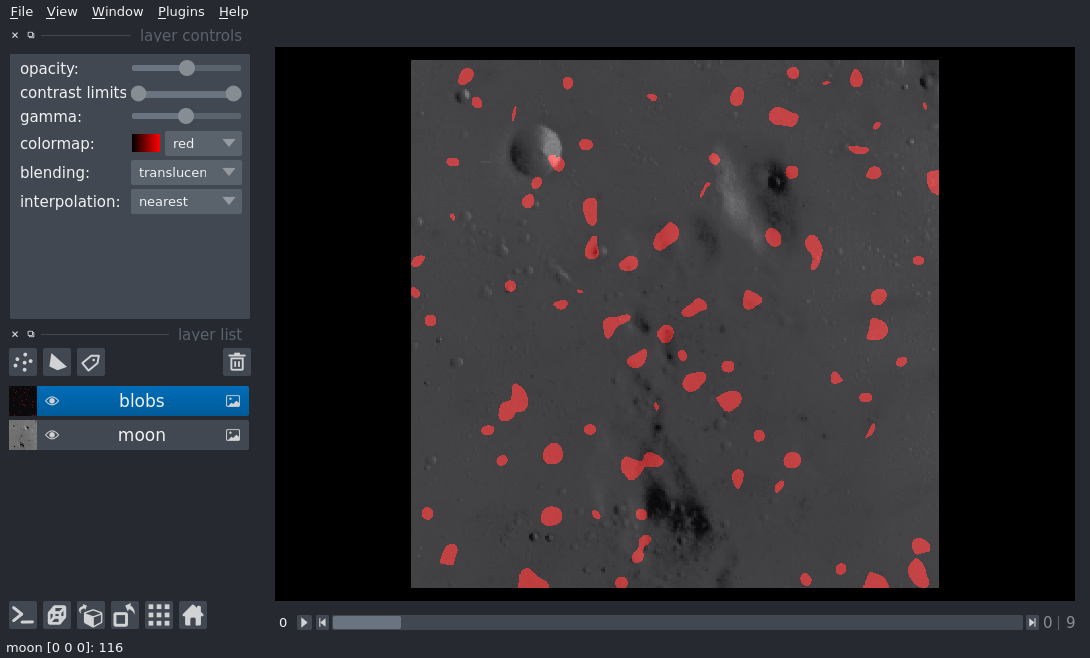

In [16]:
nbscreenshot(viewer)

### viewer buttons

Underneath the layers list there is a row of buttons that includes the `Console`
button that will show or hide our console that allows you to interact with a
python kernel. Inside the console you can access the viewer using the `viewer`
argument.

When the console button is clicked, the console will appear at the bottom of the
viewer as follows:

![image: console within napari](../assets/tutorials/console.png)

We then have a button that switches between `2D` and `3D` rendering. After
running the following code:

In [17]:
from scipy import ndimage as ndi

blobs = data.binary_blobs(length=128, volume_fraction=0.1, n_dim=3)
viewer = napari.view_image(blobs.astype(float), name='blobs')
labeled = ndi.label(blobs)[0]
viewer.add_labels(labeled, name='blob ID')

<Labels layer 'blob ID' at 0x7f88c9643430>

... clicking on the 3D button

![image: 3D_button](../assets/tutorials/3D_button.png)

and rotating the camera view with the mouse gives something like the following
view:

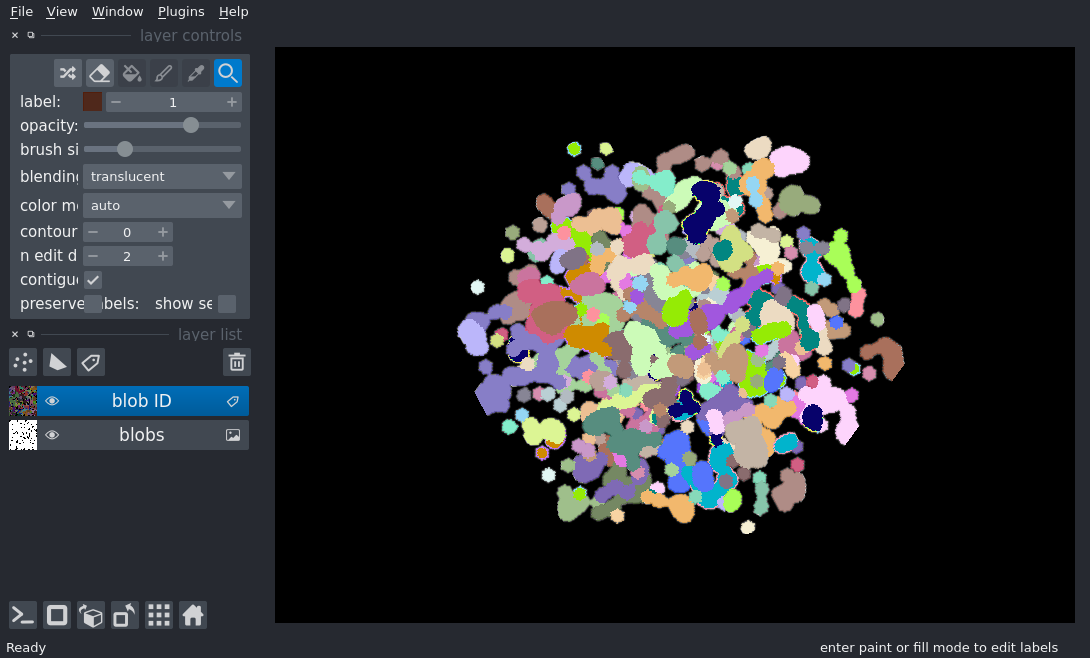

In [18]:
# programmatically adjust the camera angle
viewer.dims.ndisplay = 3
viewer.camera.zoom = 2
viewer.camera.angles = (3, 38, 53)
nbscreenshot(viewer)

Next to the 2D / 3D button is a button to roll the dimensions that are currently
being displayed in the viewer - for example if you have a `ZYX` volume and are
looking at the `YX` slice this will then show you the `ZY` slice.

After that is a button that transposes the displayed dimensions.

Finally, there is the `home` button that will reset the camera state to its
initial values.

### status bar

At the very bottom of the GUI there is a status bar that contains useful updates
and tips.

On the lefthand side of the status bar there is a message that contains
information about the position of the mouse and the values of any images or the
indices of any points that are currently hovered over, depending on which layer
is selected. The status bar will also display information about what button you
are clicking in the layer control panel too.

The righthand side of the status bar contains some helpful tips depending on
which layer and tools are currently selected.

## changing viewer theme

Currently, **napari** comes with two different themes `light` and `dark`, which
is the default. To change the theme, update `theme` property of the viewer:

In [19]:
viewer = napari.Viewer()
viewer.add_image(data.astronaut(), name='astronaut')

# change the viewer theme
viewer.theme = 'light'

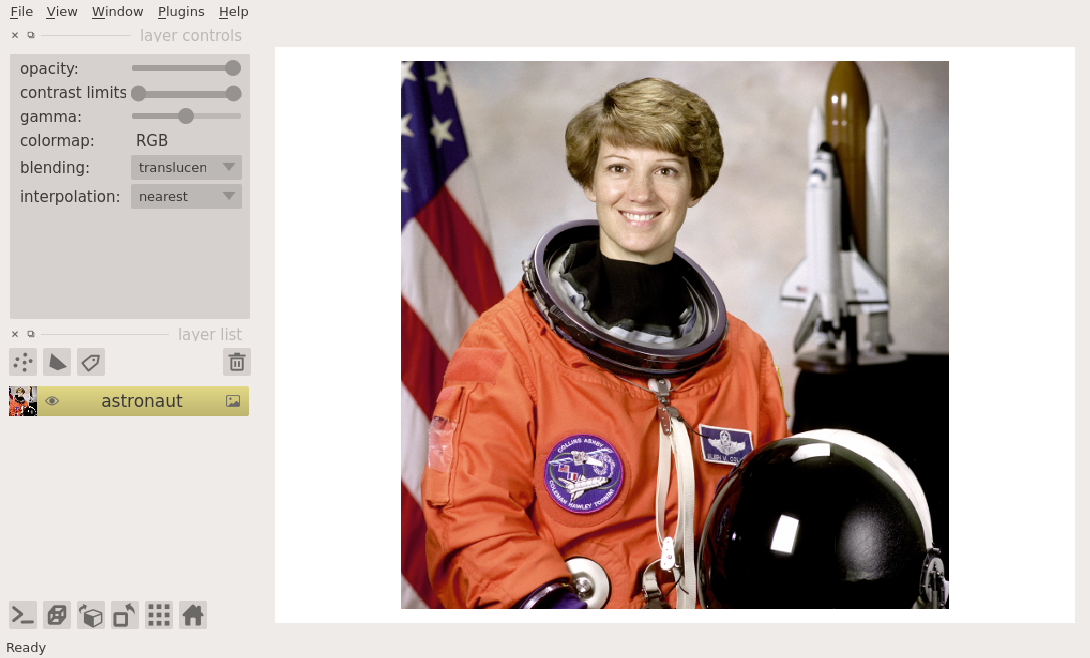

In [20]:
nbscreenshot(viewer)

In [21]:
# change the viewer theme back to dark (for the rest of tutorials)
viewer.theme = 'dark'

Adding your own custom theme isn't too hard either but does require creating
your own color `palette` and rebuilding the icons. If people want more themes,
we're happy to add them or if you look at our [contributing
guidelines](https://github.com/napari/napari/tree/master/docs/CONTRIBUTING) for
more information about building the icons and add one yourself!

## custom keybinding

One of the promises of **napari** is to provide a beginner friendly environment
for interactive analysis. For example, we want to enable workflows where people
can interact with the GUI, say click on the centers of some objects, or paint
over some regions and then perform custom analysis. As a first step towards
enabling custom interactivity we've provided support to add your own custom
keybindings to the `Viewer` or individual `Layer` objects such that when the
corresponding key gets clicked your custom function gets executed. Depending on
which object you bind your key to, your function will either get access to the
state of the entire `viewer` or `layer` object.

For example, to bind function that loops through all layers in the viewer and
prints their names to your console when you press the `p` key you can do the
following:

In [22]:
viewer = napari.Viewer()
viewer.add_image(data.astronaut(), name='astronaut')

@viewer.bind_key('p')
def print_names(viewer):
    print([layer.name for layer in viewer.layers])

In [23]:
viewer.close()

By default, your key will bind to the key press event, but it is also possible
to bind to the key release event by including a `yield` inside your function.
All code before the `yield` will get executed on key press and all code after
the `yield` will get executed on key release. The following example will print
`hello` when you start to press the `m` key and print `goodbye` when you release
it.

In [24]:
viewer = napari.Viewer()
viewer.add_image(data.astronaut(), name='astronaut')

@viewer.bind_key('m')
def print_message(viewer):
    print('hello')
    yield
    print('goodbye')

In [25]:
viewer.close()

Keys can be bound both to the object class or a particular instance depending on
if you want the keybinding to apply to all instances of the class or only one
particular instance.

Currently the keybindings only work when the main canvas is in focus, we are
working to ensure they always work.

The ability to add custom keybindings dramatically increases what is possible
within **napari** and we hope you take full advantage of them.

## next steps

Hopefully, this tutorial has given you an overview of the functionality
available on the **napari** viewer, including the `LayerList` and some of the
different layer types. To learn more about the different layer types that
**napari** supports checkout some more of our tutorials listed below. The [image
layer](./image) tutorial is a great one to try next as viewing images is a
fundamental part of what **napari** is about.